In [44]:
import requests
from requests.exceptions import HTTPError
import pandas as pd
import json as js
from datetime import datetime, timedelta
from matplotlib import pyplot as plt
# Uncomment this if you like to use the old MPL library
#from mpl_finance import candlestick_ohlc
import mplfinance as mpf
import matplotlib.dates as mpl_dates
import matplotlib.ticker as tkr
%matplotlib inline
import cufflinks as cf
import seaborn as sns

In [45]:
# Set some standard parameters upfront
pd.options.display.float_format = '{:.1f}'.format
sns.set() # default seaborn look and feel
plt.style.use('ggplot')
REST_API = 'https://api.pro.coinbase.com'
PRODUCTS = REST_API+'/products'
# I am only interested in a few currencies that I want to trade, so let's add them here:
MY_CURRENCIES = ['BTC-EUR','ETH-EUR','LTC-EUR','BCH-EUR'] 


In [46]:
def connect(url, *args, **kwargs):
    try:
        if kwargs.get('param', None) is not None:
            response = requests.get(url,params)
        else:
            response = requests.get(url)
        response.raise_for_status()
        #print('HTTP connection success!')
        return response
    except HTTPError as http_err:
        print(f'HTTP error occurred: {http_err}')
    except Exception as err:
        print(f'Other error occurred: {err}')

In [47]:
#Reusable Rest Connect Class
response = connect(PRODUCTS)
response_content = response.content
response_text = response.text
response_headers = response.headers

In [48]:
start_date = (datetime.today() - timedelta(days=300)).isoformat()
end_date = datetime.now().isoformat()
# Please refer to the coinbase documentation on the expected parameters
params = {'start':start_date, 'end':end_date, 'granularity':'86400'}
response = connect(PRODUCTS+'/ADA-USD/candles', param = params)
response_text = response.text
df_history = pd.read_json(response_text)
# Add column names in line with the Coinbase Pro documentation
df_history.columns = ['time','low','high','open','close','volume']


In [49]:
# We will add a few more columns just for better readability
df_history['date'] = pd.to_datetime(df_history['time'], unit='s')
df_history['year'] = pd.DatetimeIndex(df_history['date']).year
df_history['month'] = pd.DatetimeIndex(df_history['date']).month
df_history['day'] = pd.DatetimeIndex(df_history['date']).day
#Sort by date ascending 
df_history.sort_values(by='date', ascending=True, inplace=True)
# Only display the first 5 rows
df_history.head(5).drop(['time','date'], axis=1)

,low,high,open,close,volume,year,month,day
171,1.2,1.9,1.7,1.2,112384864.7,2021,3,18
170,1.2,1.4,1.2,1.3,166658507.6,2021,3,19
169,1.2,1.3,1.3,1.2,121442030.5,2021,3,20
168,1.2,1.2,1.2,1.2,55592643.1,2021,3,21
167,1.1,1.2,1.2,1.1,80249983.8,2021,3,22


In [50]:
df_history.set_index('date', inplace=True)
df_history.sort_index(ascending=True)
df_history

,time,low,high,open,close,volume,year,month,day
date,,,,,,,,,
2021-03-18,1616025600,1.2,1.9,1.7,1.2,112384864.7,2021,3,18
2021-03-19,1616112000,1.2,1.4,1.2,1.3,166658507.6,2021,3,19
2021-03-20,1616198400,1.2,1.3,1.3,1.2,121442030.5,2021,3,20
2021-03-21,1616284800,1.2,1.2,1.2,1.2,55592643.1,2021,3,21
2021-03-22,1616371200,1.1,1.2,1.2,1.1,80249983.8,2021,3,22
...,...,...,...,...,...,...,...,...,...
2021-09-01,1630454400,2.7,2.9,2.8,2.9,93378811.0,2021,9,1
2021-09-02,1630540800,2.8,3.1,2.9,3.0,174814779.0,2021,9,2
2021-09-03,1630627200,2.9,3.0,3.0,3.0,108852651.3,2021,9,3


In [51]:
qf = cf.QuantFig(df_history.loc["2021"])

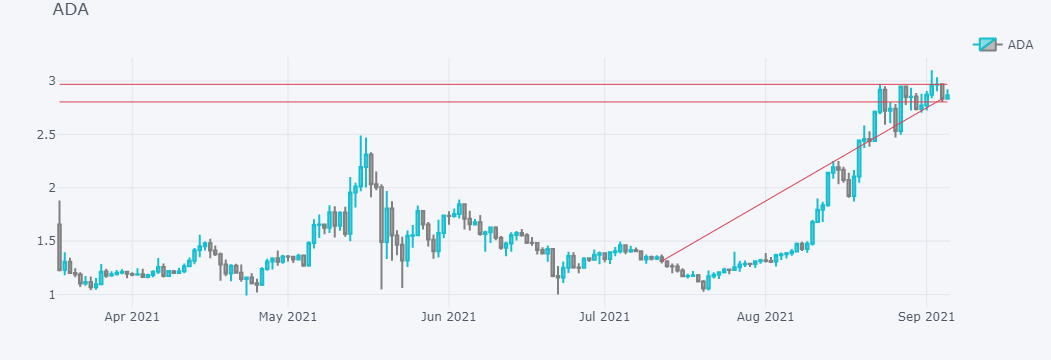

In [61]:
qf.iplot(title = "ADA", name = "ADA")

In [58]:
qf.add_resistance(date = "2021-09-04")

In [54]:
qf.add_trendline(date0 = "2021-07-12", date1 = "2021-09-04")

In [60]:
qf.add_support(date = "2021-09-04")